<a href="https://colab.research.google.com/github/surya-579/Image-Classification-using-CNNs/blob/main/Image_Classification_using_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cifar10 classification using CNNs**

(32, 32, 3) 10
Epoch 1/100
782/782 [==============================] - 16s 18ms/step - loss: 1.4826 - accuracy: 0.4663 - val_loss: 1.2457 - val_accuracy: 0.5599
Epoch 2/100
782/782 [==============================] - 8s 10ms/step - loss: 1.1513 - accuracy: 0.5962 - val_loss: 1.0640 - val_accuracy: 0.6326
Epoch 3/100
782/782 [==============================] - 8s 9ms/step - loss: 1.0202 - accuracy: 0.6443 - val_loss: 0.9806 - val_accuracy: 0.6612
Epoch 4/100
782/782 [==============================] - 7s 8ms/step - loss: 0.9286 - accuracy: 0.6793 - val_loss: 0.9700 - val_accuracy: 0.6718
Epoch 5/100
782/782 [==============================] - 6s 7ms/step - loss: 0.8592 - accuracy: 0.7026 - val_loss: 1.0099 - val_accuracy: 0.6515
Epoch 6/100
782/782 [==============================] - 5s 6ms/step - loss: 0.8039 - accuracy: 0.7206 - val_loss: 0.9027 - val_accuracy: 0.6935
Epoch 7/100
782/782 [==============================] - 7s 8ms/step - loss: 0.7504 - accuracy: 0.7387 - val_loss: 0.8867 - va

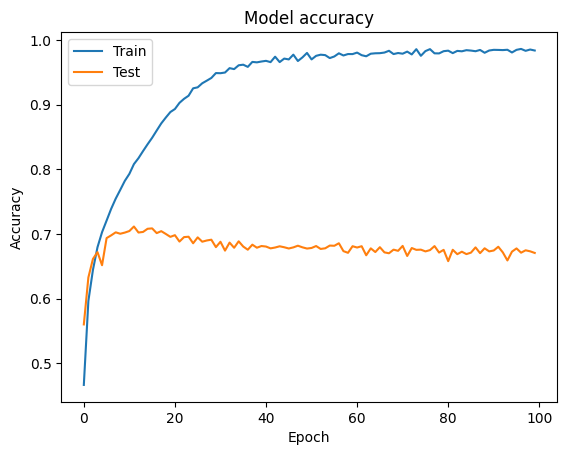

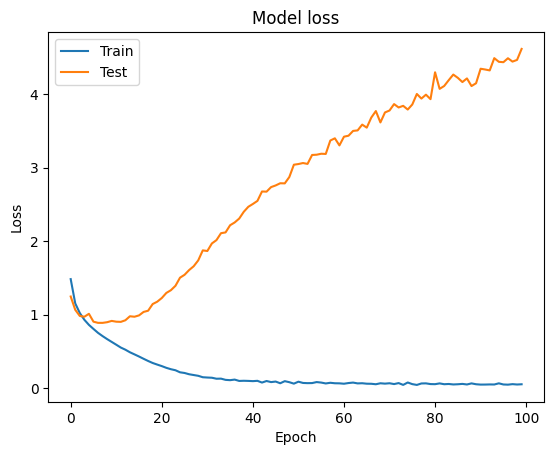

157/157 [==============================] - 1s 3ms/step - loss: 4.6194 - accuracy: 0.6705
Test accuracy:  0.6704999804496765


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load CIFAR-10 datset
(train_dataset, test_dataset),info = tfds.load('cifar10',split=['train','test'], with_info = True, as_supervised = True)

# Define input shape based on CIFAR-10 image dataset
input_shape = info.features['image'].shape
num_classes = info.features['label'].num_classes
print(input_shape, num_classes)

# Preprocess the dataset (normalize, betch, shuffle, etc.)
train_dataset = train_dataset.map(lambda x, y:(tf.cast(x, tf.float32)/255.0, y )).shuffle(10000).batch(64)
test_dataset = test_dataset.map(lambda x, y:(tf.cast(x, tf.float32)/255.0, y )).batch(64)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(num_classes, activation = "softmax")
])

# Compile the model
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

#Train the model
history = model.fit(train_dataset, epochs = 100, validation_data = test_dataset)

# Plot accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

# Plot loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset)
print("Test accuracy: ", test_acc)

# **MNIST Classification using CNNs**

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/30
1875/1875 [==============================] - 11s 3ms/step - loss: 2.3307 - accuracy: 0.1108 - val_loss: 2.2958 - val_accuracy: 0.1013
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2989 - accuracy: 0.1001 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - 

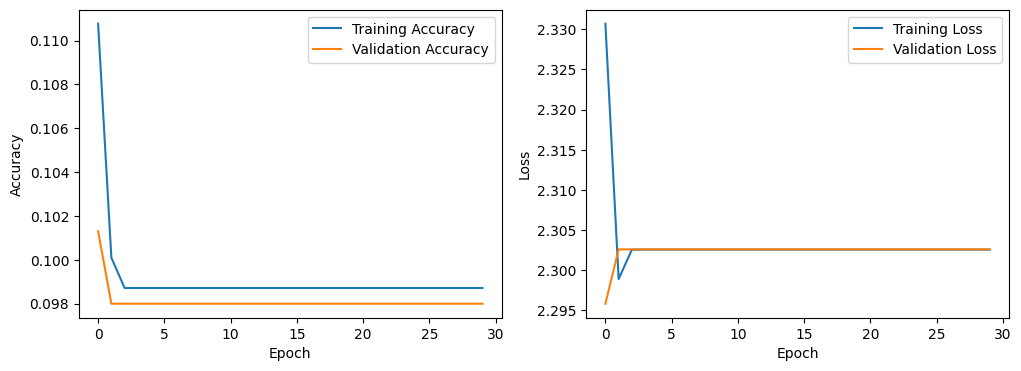

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Normalize and reshape the Input images
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation = "relu", input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu")
])

# Compile the Model (using "adam")
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy" ,metrics = ["accuracy"])

# Train the model
history = model.fit(x_train, y_train, epochs = 30, validation_data = (x_test, y_test))

# Plot accuracy and loss curves
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()